#Reprodução Artigo

##Aluno: Alisson Alves de Lucena
##Matrícula: 0123015808-15M

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

PC_WS = pd.read_csv('https://raw.githubusercontent.com/AlissonLucena21/ArtigoReproducaoFPCC2/main/Arquivos%20Pr%C3%A9%20Processados/Testes_PC_WS_Pre_Processado.csv', encoding='utf-8')
PC_BATERIA_WPA = pd.read_csv('https://raw.githubusercontent.com/AlissonLucena21/ArtigoReproducaoFPCC2/main/Arquivos%20Pr%C3%A9%20Processados/Bateria_WPA__Pre_Processado.csv', encoding='utf-8')
WPA_CPU = pd.read_csv('https://raw.githubusercontent.com/AlissonLucena21/ArtigoReproducaoFPCC2/main/Arquivos%20Pr%C3%A9%20Processados/WPA_CPU.csv', encoding='utf-8')

CELULAR_WS = pd.read_csv('https://raw.githubusercontent.com/AlissonLucena21/ArtigoReproducaoFPCC2/main/Arquivos%20Pr%C3%A9%20Processados/Testes_CELULAR_WS_Pre_Processado.csv', encoding='utf-8')
CELULAR_BATERIA_TREPN = pd.read_csv('https://raw.githubusercontent.com/AlissonLucena21/ArtigoReproducaoFPCC2/main/Arquivos%20Pr%C3%A9%20Processados/Testes_TREPN_Pre_Processado.csv', encoding='utf-8')

In [ ]:
# Selecionar as colunas de frequência de CPU
cpu_columns = ["CPU1 Frequency [kHz]",
               "CPU2 Frequency [kHz]",
               "CPU3 Frequency [kHz]",
               "CPU4 Frequency [kHz]",
               "CPU5 Frequency [kHz]",
               "CPU6 Frequency [kHz]",
               "CPU7 Frequency [kHz]",
               "CPU8 Frequency [kHz]"]

# Calcular a soma das colunas de frequência de CPU
CELULAR_BATERIA_TREPN['Sum CPU Frequency [kHz]'] = CELULAR_BATERIA_TREPN[cpu_columns].sum(axis=1)

# Agrupar os dados por "Teste" e calcular a média da coluna "Sum CPU Frequency [kHz]"
average_cpu_frequency = CELULAR_BATERIA_TREPN.groupby('Teste')['Sum CPU Frequency [kHz]'].mean()

# Adicionar a média como uma nova coluna no mesmo dataframe
CELULAR_BATERIA_TREPN['Average CPU Frequency [kHz]'] = CELULAR_BATERIA_TREPN['Teste'].map(average_cpu_frequency)

# Remover as linhas com valores NaN
CELULAR_BATERIA_TREPN_AUX = CELULAR_BATERIA_TREPN.dropna()

# Criar novo DataFrame com as últimas linhas de cada teste e as colunas desejadas
new_dataframe = CELULAR_BATERIA_TREPN_AUX.groupby('Teste').tail(1)[['Teste', 'Time  [ms].9', 'Average CPU Frequency [kHz]']]


# Formatar a coluna "Average CPU Frequency [kHz]" como valores inteiros completos
new_dataframe['Average CPU Frequency [kHz]'] = new_dataframe['Average CPU Frequency [kHz]'].apply('{:.0f}'.format)

Coeficiente de regressão (slope): -1691457.7914094327
Coeficiente linear (intercept): 15562791.298312038


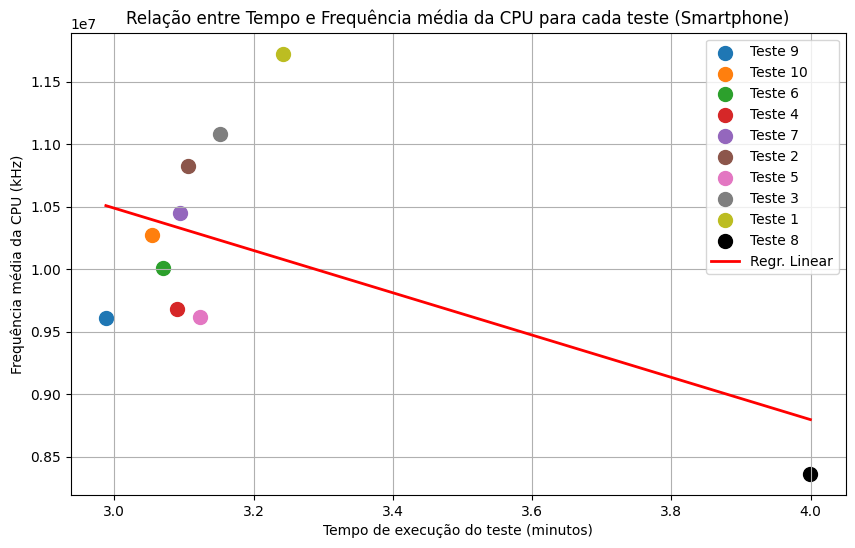

In [ ]:
# Ordenar o DataFrame pelo tempo e frequência
new_dataframe_sorted = new_dataframe.sort_values(['Time  [ms].9', 'Average CPU Frequency [kHz]'])

# Converter a coluna 'Average CPU Frequency [kHz]' para inteiro
new_dataframe_sorted['Average CPU Frequency [kHz]'] = new_dataframe_sorted['Average CPU Frequency [kHz]'].astype(int)

# Criando a paleta de cores
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#000000']
index_palette = 0

# Criar o gráfico de linha
plt.figure(figsize=(10, 6))
for teste in new_dataframe_sorted['Teste'].unique():
    data = new_dataframe_sorted[new_dataframe_sorted['Teste'] == teste]
    time_minutes = data['Time  [ms].9'] / 60000  # Converter tempo para minutos
    plt.scatter(time_minutes, data['Average CPU Frequency [kHz]'], c=np.array([color_palette[index_palette]]), marker='o', s=100, label=f'Teste {teste}')
    index_palette += 1

# Ordenar a legenda pelo nome do teste
handles, labels = plt.gca().get_legend_handles_labels()
order = [int(label.split()[1]) for label in labels]
sorted_labels = [f'Teste {label}' for label in sorted(order)]
plt.legend([handle for _, handle in sorted(zip(order, handles))], sorted_labels)

plt.xlabel('Tempo de execução do teste (minutos)')
plt.ylabel('Frequência média da CPU (kHz)')
plt.title('Relação entre Tempo e Frequência média da CPU para cada teste (Smartphone)')
plt.grid(True)

# Realizar regressão linear
X = new_dataframe_sorted['Time  [ms].9'] / 60000  # Converter tempo para minutos
y = new_dataframe_sorted['Average CPU Frequency [kHz]'].values.reshape(-1, 1)
regression_model = LinearRegression()
regression_model.fit(X.values.reshape(-1, 1), y)
predicted_y = regression_model.predict(X.values.reshape(-1, 1))

# Plotar linha de regressão
plt.plot(X, predicted_y, color='red', linewidth=2, label='Regr. Linear')

# Imprimir os coeficientes de regressão
slope = regression_model.coef_[0][0]
intercept = regression_model.intercept_[0]
print(f"Coeficiente de regressão (slope): {slope}")
print(f"Coeficiente linear (intercept): {intercept}")

plt.legend()

# Exibir o gráfico
plt.show()

Coeficiente de regressão (slope): -0.445642243057475
Coeficiente linear (intercept): 348625.6705911192


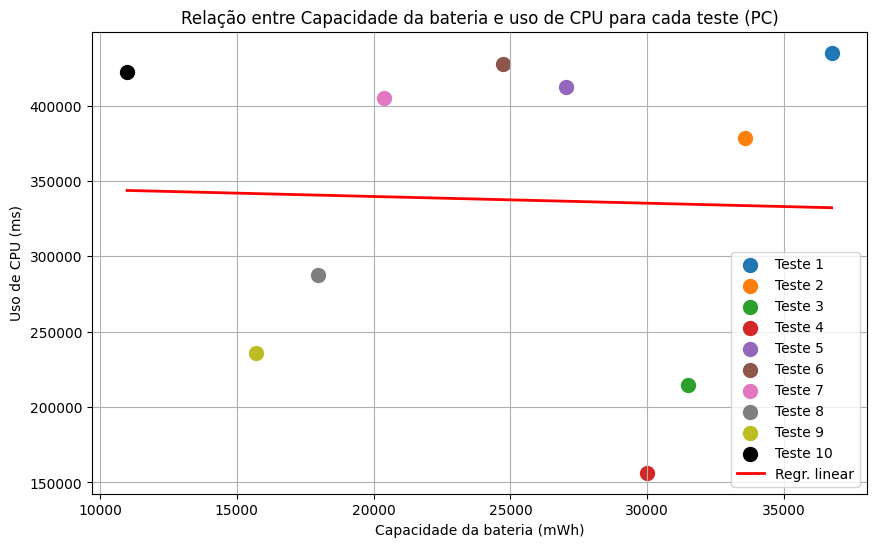

In [ ]:
# Criando DataFrames
df1 = PC_BATERIA_WPA[['Teste', 'Capacity (mWh)']]
df2 = WPA_CPU[['Teste', 'CPU Usage (in view) (ms) (sum)']]

# Mesclando os DataFrames com base no teste
merged_df = pd.merge(df1, df2, on='Teste')

# Obtendo as variáveis independentes (X) e dependente (y)
X = merged_df['Capacity (mWh)'].values.reshape(-1, 1)
y = merged_df['CPU Usage (in view) (ms) (sum)'].values.reshape(-1, 1)

# Criando um modelo de regressão linear
regression_model = LinearRegression()

# Treinando o modelo com os dados
regression_model.fit(X, y)

# Obtendo as previsões do modelo
y_pred = regression_model.predict(X)

# Plotando o gráfico de dispersão
plt.figure(figsize=(10, 6))
for i, teste in enumerate(testes):
    subset = merged_df[merged_df['Teste'] == teste]
    plt.scatter(subset['Capacity (mWh)'], subset['CPU Usage (in view) (ms) (sum)'], c=np.array([color_palette[i]]),
                marker='o', s=100, label=f'Teste {int(teste)}')

# Plotando a linha de regressão
plt.plot(X, y_pred, color='red', linewidth=2, label='Regr. linear')

plt.xlabel('Capacidade da bateria (mWh)')
plt.ylabel('Uso de CPU (ms)')
plt.title('Relação entre Capacidade da bateria e uso de CPU para cada teste (PC)')
plt.grid(True)

# Adicionando a legenda no canto do gráfico
plt.legend(loc='lower right')

# Imprimindo os coeficientes da regressão
slope = regression_model.coef_[0][0]
intercept = regression_model.intercept_[0]
print(f"Coeficiente de regressão (slope): {slope}")
print(f"Coeficiente linear (intercept): {intercept}")

# Exibindo o gráfico
plt.show()

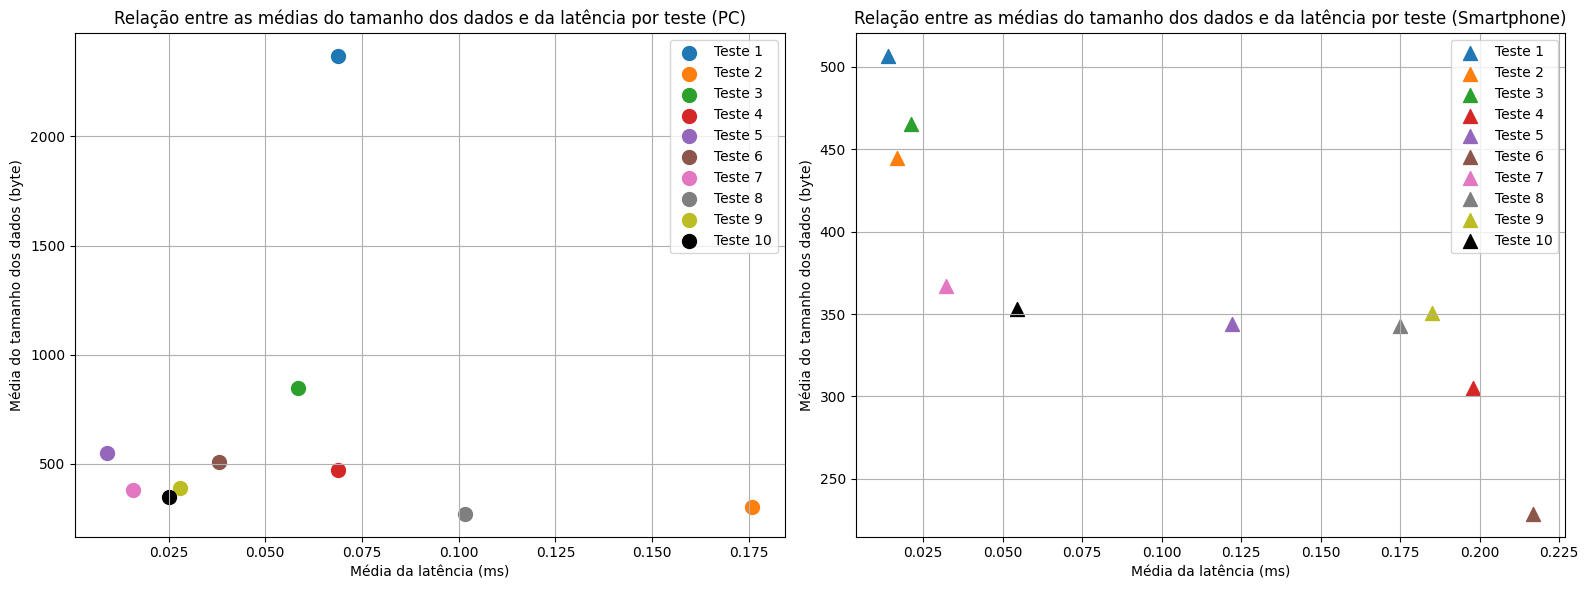

In [ ]:
# Código do primeiro gráfico

# Agrupar pelo teste e calcular a média do tamanho dos dados
avg_data_length_teste1 = PC_WS.groupby('Teste')['Length'].mean()

# Agrupar pelo teste e calcular a média da latência
avg_latency_teste1 = PC_WS.groupby('Teste')['frame.time_delta'].mean()

# Criar um novo DataFrame com as médias do tamanho dos dados e da latência por teste
data_avg1 = pd.DataFrame({'Teste': avg_data_length_teste1.index,
                         'Avg Data Length': avg_data_length_teste1.values,
                         'Avg Latency': avg_latency_teste1.values})

# Ordenar o DataFrame pelo teste
data_avg1 = data_avg1.sort_values('Teste')

# Código do segundo gráfico

# Agrupar pelo teste e calcular a média do tamanho dos dados
avg_data_length_teste2 = CELULAR_WS.groupby('Teste')['Length'].mean()

# Agrupar pelo teste e calcular a média da latência
avg_latency_teste2 = CELULAR_WS.groupby('Teste')['frame.time_delta'].mean()

# Criar um novo DataFrame com as médias do tamanho dos dados e da latência por teste
data_avg2 = pd.DataFrame({'Teste': avg_data_length_teste2.index,
                         'Avg Data Length': avg_data_length_teste2.values,
                         'Avg Latency': avg_latency_teste2.values})

# Ordenar o DataFrame pelo teste
data_avg2 = data_avg2.sort_values('Teste')

# Definir cores distintas para cada teste
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#000000']

# Criar a figura com a matriz de subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1
ax1 = axes[0]
for _, row in data_avg1.iterrows():
    teste_label = f"Teste {int(row['Teste'])}"
    color_index = int(row['Teste']) - 1  # Índice da cor correspondente ao teste
    ax1.scatter(row['Avg Latency'], row['Avg Data Length'], color=color_palette[color_index], s=100, label=teste_label)

ax1.set_xlabel('Média da latência (ms)')
ax1.set_ylabel('Média do tamanho dos dados (byte)')
ax1.set_title('Relação entre as médias do tamanho dos dados e da latência por teste (PC)')
ax1.legend()
ax1.grid(True)

# Gráfico 2
ax2 = axes[1]
for _, row in data_avg2.iterrows():
    teste_label = f"Teste {int(row['Teste'])}"
    color_index = int(row['Teste']) - 1  # Índice da cor correspondente ao teste
    ax2.scatter(row['Avg Latency'], row['Avg Data Length'], color=color_palette[color_index], marker='^', s=100, label=teste_label)

ax2.set_xlabel('Média da latência (ms)')
ax2.set_ylabel('Média do tamanho dos dados (byte)')
ax2.set_title('Relação entre as médias do tamanho dos dados e da latência por teste (Smartphone)')
ax2.legend()
ax2.grid(True)

# Ajustar espaçamento entre os gráficos
plt.tight_layout()

# Exibir a matriz de gráficos
plt.show()

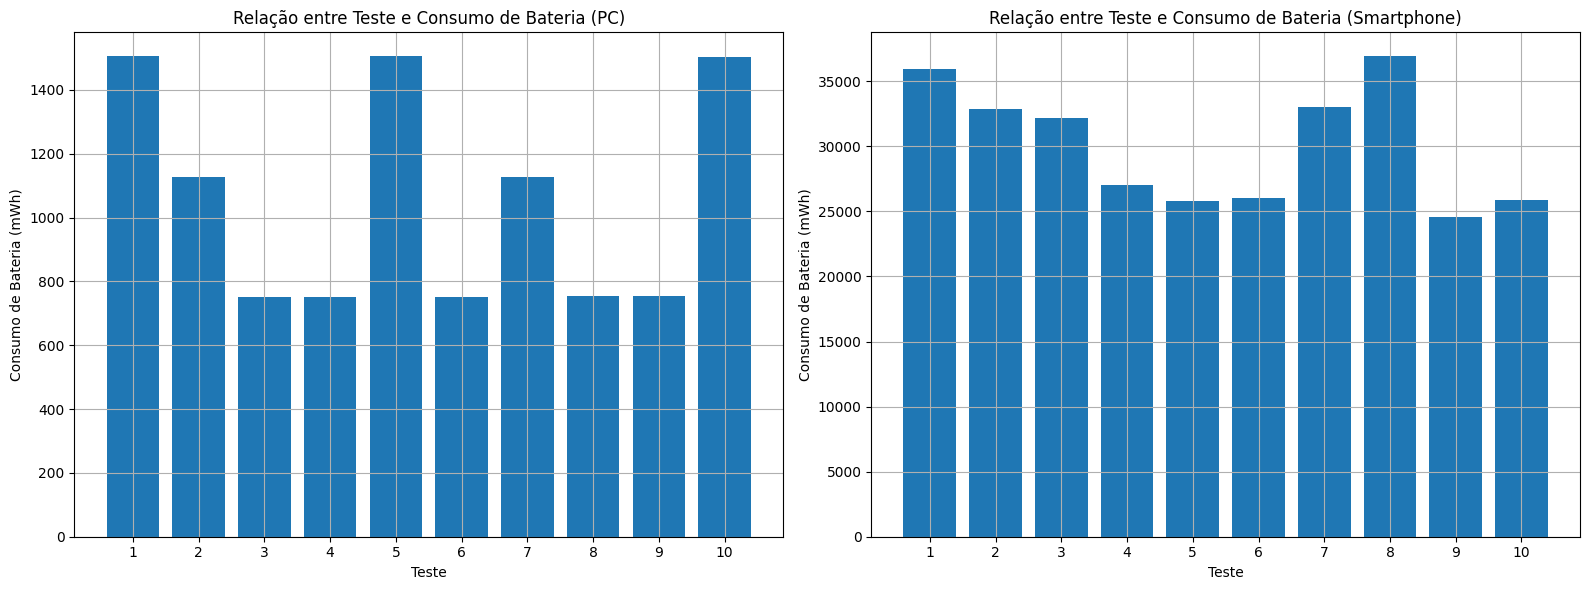

In [ ]:
# Dados do primeiro gráfico
data1 = CELULAR_BATERIA_TREPN[['Teste', 'Battery Power* [uW]']]
data1 = CELULAR_BATERIA_TREPN.groupby('Teste')['Battery Power* [uW]'].sum().reset_index()

# Conversão de dados
merged_data = pd.merge(data1, new_dataframe, on='Teste', how='inner')
merged_data['Time [h]'] = merged_data['Time  [ms].9'] / 3600000
merged_data['Battery Power* [uWh]'] = merged_data['Battery Power* [uW]'] * merged_data['Time [h]']
merged_data['Battery Power* [uWh]'] = merged_data['Battery Power* [uWh]'].astype(float)
merged_data['Battery Power* [mWh]'] = merged_data['Battery Power* [uWh]'] * 0.001

# Criar a matriz de gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Primeiro gráfico
axes[0].bar(PC_BATERIA_WPA['Teste'], PC_BATERIA_WPA['Capacity Drain (mWh)'])
axes[0].set_xlabel('Teste')
axes[0].set_ylabel('Consumo de Bateria (mWh)')
axes[0].set_title('Relação entre Teste e Consumo de Bateria (PC)')
axes[0].grid(True)
axes[0].set_xticks(range(1, len(PC_BATERIA_WPA['Teste']) + 1))

# Segundo gráfico
axes[1].bar(merged_data['Teste'], merged_data['Battery Power* [mWh]'])
axes[1].set_xlabel('Teste')
axes[1].set_ylabel('Consumo de Bateria (mWh)')
axes[1].set_title('Relação entre Teste e Consumo de Bateria (Smartphone)')
axes[1].grid(True)
axes[1].set_xticks(range(1, len(merged_data['Teste']) + 1))

# Ajustar espaçamento entre os gráficos
plt.tight_layout()

# Exibir a matriz de gráficos
plt.show()

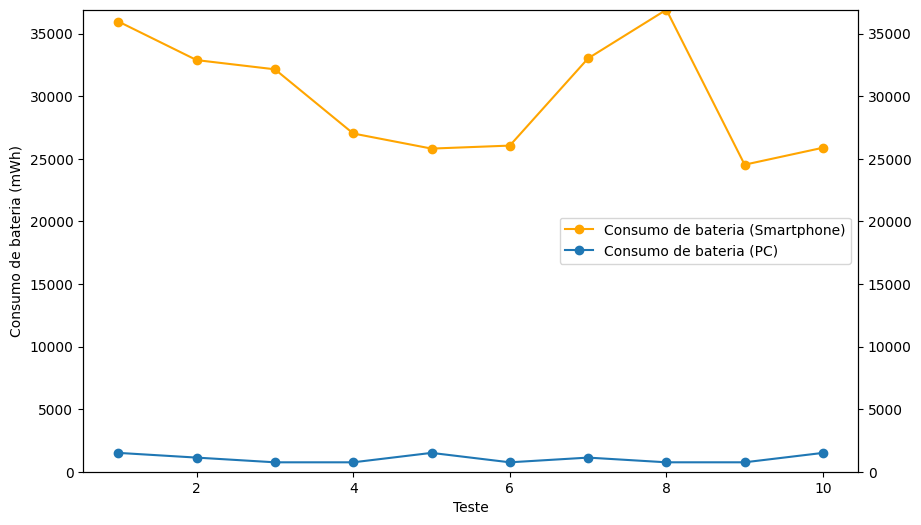

In [ ]:
# Configurar figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de linha para 'Battery Power* [mWh]'
ax.plot(merged_data['Teste'], merged_data['Battery Power* [mWh]'], marker='o', color='orange', label='Consumo de bateria (Smartphone)')
ax.set_ylabel('Consumo de bateria (mWh)')

# Gráfico de linha para 'Capacity Drain (mWh)'
ax2 = ax.twinx()
ax2.plot(PC_BATERIA_WPA['Teste'], PC_BATERIA_WPA['Capacity Drain (mWh)'], marker='o', label='Consumo de bateria (PC)')

# Configurar eixos x
ax.set_xlabel('Teste')

# Calcular valores máximos das colunas
max_value = max(merged_data['Battery Power* [mWh]'].max(), PC_BATERIA_WPA['Capacity Drain (mWh)'].max())

# Definir a mesma escala para o eixo Y
ax.set_ylim(0, max_value)
ax2.set_ylim(0, max_value)

# Adicionar legenda
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right')

# Exibir o gráfico
plt.show()

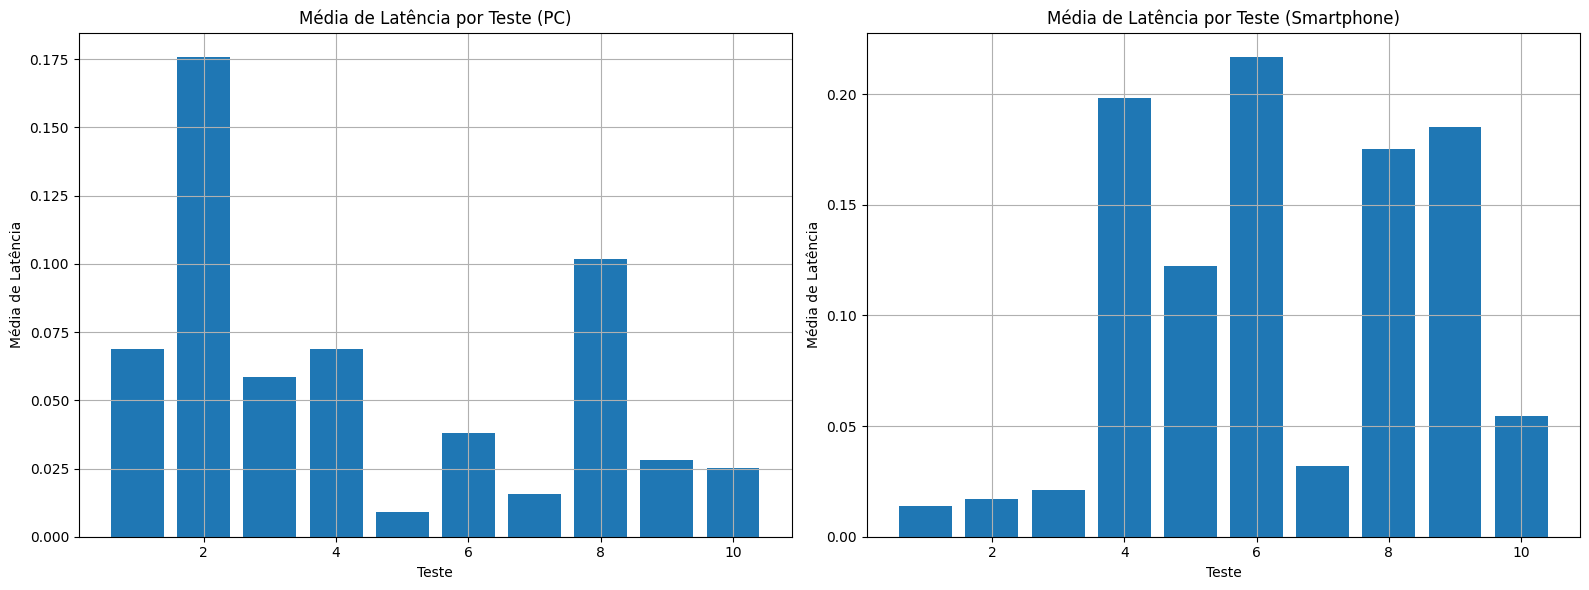

In [ ]:
# Agrupar pelo teste e calcular a média da latência para o primeiro conjunto de dados
avg_latency_1 = PC_WS.groupby('Teste')['frame.time_delta'].mean()

# Agrupar pelo teste e calcular a média da latência para o segundo conjunto de dados
avg_latency_2 = CELULAR_WS.groupby('Teste')['frame.time_delta'].mean()

# Criar a figura e os subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Configurar o primeiro gráfico de barras
ax1.bar(avg_latency_1.index, avg_latency_1)
ax1.set_xlabel('Teste')
ax1.set_ylabel('Média de Latência')
ax1.set_title('Média de Latência por Teste (PC)')
ax1.grid(True)

# Configurar o segundo gráfico de linha
ax2.bar(avg_latency_2.index, avg_latency_2)
ax2.set_xlabel('Teste')
ax2.set_ylabel('Média de Latência')
ax2.set_title('Média de Latência por Teste (Smartphone)')
ax2.grid(True)

# Ajustar a posição dos subplots
fig.tight_layout()

# Exibir os gráficos
plt.show()

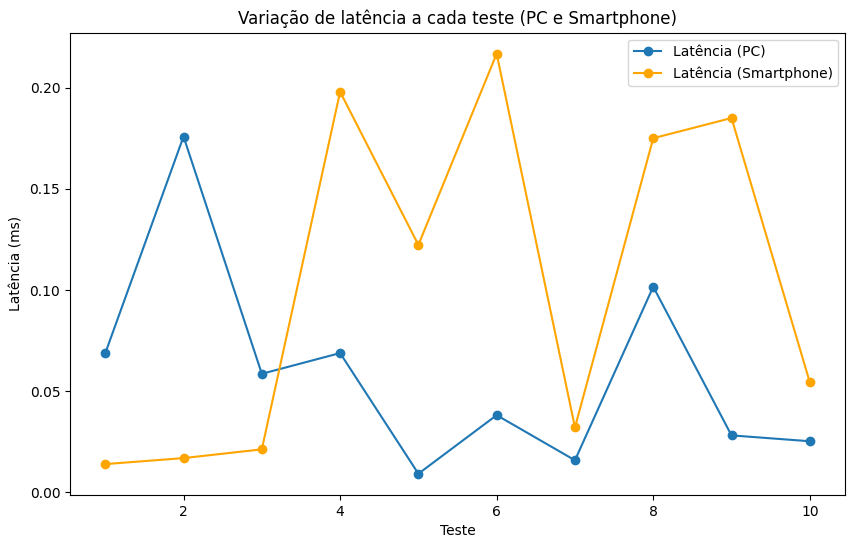

In [ ]:
# Converter séries em dataframes
avg_latency_1_copy = pd.DataFrame({'Index': avg_latency_1.index, 'frame.time_delta': avg_latency_1.values})
avg_latency_2_copy = pd.DataFrame({'Index': avg_latency_2.index, 'frame.time_delta': avg_latency_2.values})

# Configurar figura e eixos
fig, ax = plt.subplots(figsize=(10, 6))

# Gráfico de linha para 'frame.time_delta' - avg_latency_1_copy
ax.plot(avg_latency_1_copy['Index'], avg_latency_1_copy['frame.time_delta'], marker='o', label='Latência (PC)')

# Gráfico de linha para 'frame.time_delta' - avg_latency_2_copy
ax.plot(avg_latency_2_copy['Index'], avg_latency_2_copy['frame.time_delta'], marker='o', color='orange', label='Latência (Smartphone)')

# Configurar eixos
ax.set_xlabel('Teste')
ax.set_ylabel('Latência (ms)')
ax.set_title('Variação de latência a cada teste (PC e Smartphone)')
ax.legend()

# Exibir o gráfico
plt.show()